# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rizki Rahman Maulana]
- **Email:** [mc253d5y0335@student.devacademy.id]
- **ID Dicoding:** [MC253D5Y0335]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) pada bagian pusat kota beijing (Antizhongxin, Dongsi) berubah dari waktu ke waktu?
- Apakah ada korelasi antara kondisi cuaca (suhu, tekanan, kelembaban, curah hujan) dan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import folium
from folium.plugins import HeatMap
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Mengimpor pustaka penting untuk analisis data dan visualisasi.
- Pandas untuk manipulasi data, Matplotlib dan Seaborn untuk visualisasi, serta NumPy untuk operasi numerik.


## Data Wrangling

### Gathering Data

In [85]:
local_zip = '/content/drive/MyDrive/Dataset/Air-quality-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Insight:**
- Mengekstrak zipfile dan memindahkannya ke lokal yang ada pada google collab

In [86]:
aotizhongxin_df = pd.read_csv('/content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Memuat dataset aotizhongxin dari file CSV ke dalam DataFrame Pandas untuk analisis lebih lanjut.
- Data ini mengandung informasi tentang kualitas udara di dalam rentang waktu tertentu.


In [87]:
dongsin_df = pd.read_csv('/content/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Memuat dataset Dongsi dari file CSV ke dalam DataFrame Pandas untuk analisis lebih lanjut.
- Data ini mengandung informasi tentang kualitas udara di dalam rentang waktu tertentu.


### Assessing Data

#### Menilai Tabel `aotizhongxin_df`

In [88]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Menyajikan ringkasan dataset, termasuk jumlah baris, kolom, tipe data, dan nilai yang hilang.
- Dari sini, kita bisa mengetahui apakah ada kolom yang perlu ditangani sebelum analisis lebih lanjut.


In [89]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, baik secara imputasi atau penghapusan data.


In [90]:
print('Jumlah duplikasi: ', aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menjalankan proses analisis tentang jumlah file duplikasi untuk mendapatkan informasi yang lebih mendalam.


In [91]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Menampilkan statistik deskriptif dari dataset seperti rata-rata, nilai minimum, maksimum, dan standar deviasi.
- Dapat membantu dalam memahami distribusi data serta menemukan kemungkinan anomali.


#### Menilai Tabel `dongsi_df`

In [92]:
dongsin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Menyajikan ringkasan dataset, termasuk jumlah baris, kolom, tipe data, dan nilai yang hilang.
- Dari sini, kita bisa mengetahui apakah ada kolom yang perlu ditangani sebelum analisis lebih lanjut.


In [93]:
dongsin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, baik secara imputasi atau penghapusan data.


In [94]:
print('Jumlah duplikasi: ', dongsin_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menjalankan proses analisis tentang jumlah file duplikasi untuk mendapatkan informasi yang lebih mendalam.


In [95]:
dongsin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Menampilkan statistik deskriptif dari dataset seperti rata-rata, nilai minimum, maksimum, dan standar deviasi.
- Dapat membantu dalam memahami distribusi data serta menemukan kemungkinan anomali.


### Cleaning Data

#### Membersihkan Tabel `aotizhongxin_df`

##### Missing Values

In [96]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, seperti imputasi atau penghapusan data.
- Untuk nilai numerik saya akan menggunakan rata-rata bukan penghapusan baris karena masih banyak nilai penting yang ada pada baris.
- Lalu untuk object saya akan menggunakan nilai terbanyak/modus agar tidak mengubah analisis data secara signifikan.

In [97]:
for col in aotizhongxin_df.columns:
    if pd.api.types.is_numeric_dtype(aotizhongxin_df[col]):
        aotizhongxin_df[col] = aotizhongxin_df[col].fillna(aotizhongxin_df[col].mean())


**Insight:**
- Mengatasi nilai yang hilang dalam dataset dengan menggantikannya menggunakan rata-rata.
- Pendekatan ini memastikan data tetap lengkap dan dapat digunakan dalam analisis.


In [98]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengecek kembali jumlah nilai yang hilang di setiap kolom dataset untuk memastikan.


In [99]:
aotizhongxin_df[aotizhongxin_df.wd.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,56.353358,-3.200000,1020.50000,-4.000000,0.000000,NaN,0.100000,Aotizhongxin
11718,11719,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.000000,21.500000,998.20000,21.500000,0.100000,NaN,0.200000,Aotizhongxin
13412,13413,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.000000,21.700000,1008.00000,15.800000,0.000000,NaN,0.000000,Aotizhongxin
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.000000,13.584607,1011.84692,3.123062,0.067421,NaN,1.708496,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,246.0,266.0,63.0,82.0,300.0,51.000000,0.625000,1016.00000,-7.900000,0.000000,NaN,0.500000,Aotizhongxin
34334,34335,2017,1,29,14,15.0,55.0,4.0,6.0,300.0,80.000000,-1.220000,1025.00000,-21.600000,0.000000,NaN,6.500000,Aotizhongxin
34560,34561,2017,2,8,0,113.0,124.0,17.0,105.0,2600.0,2.000000,-2.800000,1026.30000,-7.000000,0.000000,NaN,0.200000,Aotizhongxin
34638,34639,2017,2,11,6,15.0,24.0,16.0,71.0,600.0,25.000000,-4.600000,1025.00000,-18.100000,0.000000,NaN,0.200000,Aotizhongxin


**Insight:**
- Menjalankan proses analisis untuk memastikan kembali dan mendapatkan informasi yang lebih mendalam.


In [100]:
aotizhongxin_df.wd.value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


**Insight:**
- Mengecek jumlah nilai/label yang ada pada kolom object, untuk mencari modus.

In [101]:
aotizhongxin_df.fillna(value='NE', inplace=True)

**Insight:**
- Mengisi nilai kosong pada object dengan modus yaitu 'NE'

In [102]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Memastikan kembali bahwa semua data kosong sudah terisi atau belum.

#### Membersihkan Tabel `dongsi_df`

##### Missing Values

In [103]:
dongsin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, seperti imputasi atau penghapusan data.
- Untuk nilai numerik saya akan menggunakan rata-rata bukan penghapusan baris karena masih banyak nilai penting yang ada pada baris.
- Lalu untuk object saya akan menggunakan nilai terbanyak/modus agar tidak mengubah analisis data secara signifikan.

In [104]:
for col in dongsin_df.columns:
    if pd.api.types.is_numeric_dtype(dongsin_df[col]):
        dongsin_df[col] = dongsin_df[col].fillna(dongsin_df[col].mean())


**Insight:**
- Mengatasi nilai yang hilang dalam dataset dengan menggantikannya menggunakan rata-rata.
- Pendekatan ini memastikan data tetap lengkap dan dapat digunakan dalam analisis.


In [105]:
dongsin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengecek kembali jumlah nilai yang hilang di setiap kolom dataset untuk memastikan.


In [106]:
dongsin_df[dongsin_df.wd.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,35.0,50.0,14.0,66.0,1000.0,2.0,13.67149,1012.547419,2.447535,0.06402,NaN,1.860785,Dongsi
17263,17264,2015,2,18,7,12.0,12.0,8.0,24.0,400.0,50.0,13.67149,1012.547419,2.447535,0.06402,NaN,1.860785,Dongsi
20853,20854,2015,7,17,21,89.0,111.0,4.0,72.0,1700.0,56.0,23.70000,1002.300000,21.600000,0.00000,NaN,0.100000,Dongsi
23035,23036,2015,10,16,19,295.0,318.0,40.0,177.0,2700.0,57.0,16.70000,1012.600000,12.600000,0.00000,NaN,0.200000,Dongsi
23059,23060,2015,10,17,19,357.0,375.0,22.0,215.0,3500.0,5.0,16.00000,1013.600000,13.300000,0.00000,NaN,0.100000,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2017,1,28,18,258.0,350.0,58.0,79.0,3100.0,4.0,0.62500,1016.000000,-7.900000,0.00000,NaN,0.500000,Dongsi
34334,34335,2017,1,29,14,15.0,68.0,3.0,8.0,300.0,67.0,-1.22000,1025.000000,-21.600000,0.00000,NaN,6.500000,Dongsi
34560,34561,2017,2,8,0,121.0,146.0,22.0,78.0,2300.0,6.0,-2.80000,1026.300000,-7.000000,0.00000,NaN,0.200000,Dongsi
34638,34639,2017,2,11,6,19.0,19.0,10.0,67.0,1100.0,5.0,-4.60000,1025.000000,-18.100000,0.00000,NaN,0.200000,Dongsi


**Insight:**
- Menjalankan proses analisis untuk memastikan kembali dan mendapatkan informasi yang lebih mendalam.


In [107]:
dongsin_df.wd.value_counts()

,count
wd,
ENE,3861
E,3564
NE,3540
ESE,2706
SW,2481
NW,2466
SSW,1953
NNE,1928
SE,1880


**Insight:**
- Mengecek jumlah nilai/label yang ada pada kolom object, untuk mencari modus.

In [108]:
dongsin_df.fillna(value='ENE', inplace=True)

**Insight:**
- Mengisi nilai kosong dengan modus yaitu nilai 'ENE'.

In [109]:
dongsin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Memastikan kembali bahwa semua data kosong sudah terisi atau belum.

## Exploratory Data Analysis (EDA)

### Explore `aotizhongxin_df`

In [110]:
aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16919,16920,2015,2,3,23,15.0,62.0,14.0,26.0,500.0,70.0,1.0,1025.0,-16.9,0.0,N,6.2,Aotizhongxin
12008,12009,2014,7,14,8,21.0,21.0,3.0,45.0,600.0,29.0,29.2,997.2,16.7,0.0,NNE,0.9,Aotizhongxin
20363,20364,2015,6,27,11,79.0,100.0,4.0,47.0,900.0,54.0,25.2,1001.8,20.2,0.0,ENE,1.2,Aotizhongxin
17354,17355,2015,2,22,2,76.0,845.0,2.0,4.0,300.0,69.0,-3.3,1020.5,-23.1,0.0,NW,7.0,Aotizhongxin
28497,28498,2016,5,31,9,32.0,85.0,13.0,27.0,800.0,57.0,24.5,1006.3,4.3,0.0,SE,2.4,Aotizhongxin


**Insight:**
- Mencoba melihat 5 sample data random untuk mengetahui struktur data dari aotizhongxin.

In [111]:
aotizhongxin_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


**Insight:**
- Melakukan analisis mendalam terhadap dataset untuk mengetahui nilai dari setiap kolom berupa nilai min,max,mean,dll.
- Ini dilakukan untuk mengecek kira-kira apakah ada data anomali yang ada pada dataset.

In [112]:
aotizhongxin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM2.5" : ["max", "min", "mean", "std"]
})

No  PM2.5                            
     nunique    max  min       mean         std
year                                           
2013    7344  665.0  3.0  82.393043   73.615581
2014    8760  584.0  3.0  90.333581   80.546945
2015    8760  657.0  3.0  82.134578   84.553837
2016    8784  898.0  3.0  74.279022   76.406974
2017    1416  713.0  3.0  94.626679  114.185700

**Insight:**
- Mencoba secara spesifik untuk mengetahui korelasi nilai PM2.5 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM2.5 dari tahun ketahun.

In [113]:
aotizhongxin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM10" : ["max", "min", "mean", "std"]
})

No   PM10                             
     nunique    max  min        mean         std
year                                            
2013    7344  844.0  2.0  112.913167   84.444642
2014    8760  948.0  3.0  121.389921   97.732866
2015    8760  984.0  3.0  112.035381   99.496291
2016    8784  884.0  4.0   94.842749   86.545418
2017    1416  858.0  3.0  107.357984  117.802626

**Insight:**
- Sama halnya dengan sebelumnya, disini secara spesifik untuk mengetahui korelasi nilai PM10 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM10 dari tahun ketahun.

In [114]:
aotizhongxin_df.groupby(by="PM2.5").hour.nunique().sort_values(ascending=False)

,hour
PM2.5,
3.0,24
98.0,24
96.0,24
94.0,24
93.0,24
...,...
387.0,1
480.0,1
479.0,1


**Insight:**
- Melihat kualitas udara berdasarkan indikator PM2.5 dari jam ke jam
- Hal ini bisa jadi acuan untuk mengetahui kira-kira jam berapa saja indikator polusi udara tertinggi yang bisa menjadi pertimbangan seseorang untuk beraktifitas diluar rumah

In [115]:
hourly_averages = aotizhongxin_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

max_mean_hours = {}
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
  max_mean_hours[col] = hourly_averages[col].idxmax()

print("Hourly averages:\n", hourly_averages)
print("\nHour with the maximum mean for each pollutant:")
for pollutant, hour in max_mean_hours.items():
  max_mean_value = hourly_averages.loc[hour, pollutant]
  print(f"{pollutant}: Hour {hour} with value {max_mean_value}")


Hourly averages:
           PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     92.099235  124.350027  18.150487  71.550544  1433.198032   39.501768
1     91.865678  123.402581  18.319496  70.408775  1458.986608   35.625939
2     91.491893  120.106222  17.335699  66.809055  1436.846940   32.529460
3     88.581518  114.429317  16.477107  65.017039  1349.519521   30.918985
4     85.278254  109.071301  15.557941  64.175618  1311.214618   33.751350
5     81.751254  103.495763  14.872624  61.923385  1292.133692   26.693346
6     79.837240  100.584797  14.785181  61.374384  1294.503949   25.433676
7     77.673445   98.930274  15.098653  61.428828  1315.359603   24.640175
8     77.855941  101.430876  16.612445  61.592626  1334.580843   26.642686
9     78.644881  103.663033  18.877241  58.985241  1331.317663   33.507320
10    79.313291  103.386032  20.180924  55.537759  1300.932694   44.829502
11    7

**Insight:**
- Mengecek indikator udara(PM2.5, PM10, SO2, NO2, CO, O3,) tertinggi dari kolom hour.
- Hal ini dilakukan untuk mengetahui rentang jam berapa saja polusi tertinggi
- Dari hasil diatas terlihat bahwa rentang jam 22 malam - 1 dinihari terlihat beberapa indikator (PM2.5, PM10, NO2, CO) berada di titik tertinggi. Yang menunjukkan bahwa pada daerah Aotizhongxin banyak beraktifitas pada malam hari mungkin seperti kegiatan night market atau hiburan malam. Selain itu juga, pada jam tersebut komponen polusi udara terperangkap didaratan dan tidak terserap oleh pepohonan dikarenakan pohon dapat menyerap polusi pada pagi hari dengan bantuan sinar matahari.

### Explore `dongsin_df`

In [116]:
dongsin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31153,31154,2016,9,19,1,16.0,16.0,2.0,45.0,600.0,2.0,16.9,1018.1,12.4,0.0,N,1.6,Dongsi
22118,22119,2015,9,8,14,37.0,44.0,10.0,16.0,600.0,167.0,27.4,1010.3,11.4,0.0,SSW,2.0,Dongsi
4225,4226,2013,8,24,1,45.0,106.0,10.0,81.0,1100.0,26.0,23.1,1005.7,19.5,0.0,NNE,1.1,Dongsi
18698,18699,2015,4,19,2,114.0,114.0,7.0,58.0,1100.0,26.0,15.3,1008.7,10.3,0.0,W,2.2,Dongsi
21641,21642,2015,8,19,17,55.0,55.0,3.0,21.0,700.0,173.0,27.2,1005.4,19.3,0.0,NE,1.5,Dongsi


**Insight:**
- Mencoba melihat 5 sample data random untuk mengetahui struktur data dari Dongsi.

In [117]:
dongsin_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.644198,97.442239,22.688062,33.174871,1135.697130,57.481150,11.45515,10.263131,13.806757,0.786058,NaN,1.280113,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Insight:**
- Melakukan analisis mendalam terhadap dataset untuk mengetahui nilai dari setiap kolom berupa nilai min,max,mean,dll.
- Ini dilakukan untuk mengecek kira-kira apakah ada data anomali yang ada pada dataset.

In [118]:
dongsin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM2.5" : ["max", "min", "mean", "std"]
})

No  PM2.5                             
     nunique    max  min        mean         std
year                                            
2013    7344  520.0  3.0   86.925760   76.020918
2014    8760  737.0  3.0   87.455485   83.611213
2015    8760  685.0  3.0   87.326436   91.716622
2016    8784  695.0  3.0   80.465800   81.283620
2017    1416  681.0  3.0  103.130529  122.061700

**Insight:**
- Mencoba secara spesifik untuk mengetahui korelasi nilai PM2.5 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM2.5 dari tahun ketahun.

In [119]:
dongsin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM10" : ["max", "min", "mean", "std"]
})

No   PM10                             
     nunique    max  min        mean         std
year                                            
2013    7344  602.0  2.0  105.018146   80.618013
2014    8760  794.0  3.0  116.939118   98.201290
2015    8760  816.0  3.0  111.840239  102.046496
2016    8784  891.0  5.0  103.282334   94.810885
2017    1416  955.0  5.0  131.536060  142.876649

**Insight:**
- Sama halnya dengan sebelumnya, disini secara spesifik untuk mengetahui korelasi nilai PM10 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM10 dari tahun ketahun.

In [120]:
dongsin_df.groupby(by="PM2.5").hour.nunique().sort_values(ascending=False)

,hour
PM2.5,
3.0,24
80.0,24
4.0,24
92.0,24
91.0,24
...,...
500.0,1
499.0,1
496.0,1


**Insight:**
- Melihat kualitas udara berdasarkan indikator PM2.5 dari jam ke jam
- Hal ini bisa jadi acuan untuk mengetahui kira-kira jam berapa saja indikator polusi udara tertinggi yang bisa menjadi pertimbangan seseorang untuk beraktifitas diluar rumah

In [121]:
hourly_averages = dongsin_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

max_mean_hours = {}
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
  max_mean_hours[col] = hourly_averages[col].idxmax()

print("Hourly averages:\n", hourly_averages)
print("\nHour with the maximum mean for each pollutant:")
for pollutant, hour in max_mean_hours.items():
  max_mean_value = hourly_averages.loc[hour, pollutant]
  print(f"{pollutant}: Hour {hour} with value {max_mean_value}")


Hourly averages:
           PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     96.944408  124.497185  19.009088  63.262379  1478.929208   43.674057
1     96.449602  121.676522  19.380764  62.266629  1484.686081   39.305963
2     94.900522  118.950238  18.981928  61.331520  1487.251000   33.207475
3     92.505644  114.242424  18.993811  60.664653  1334.468993   29.515105
4     89.114474  108.771208  18.441306  59.402560  1272.691298   31.355788
5     85.188198  103.779422  17.606706  57.298641  1390.667979   28.437321
6     82.360348  102.352540  17.079637  57.260856  1409.230324   27.021312
7     80.403188  101.576659  17.376033  58.149591  1427.608384   26.147041
8     80.006002  102.737370  18.119556  58.561526  1440.085502   28.211192
9     79.685449  102.504268  19.198772  55.712970  1396.733782   35.604629
10    79.814313  101.989310  20.235329  52.511274  1344.371490   46.084589
11    8

**Insight:**
- Mengecek indikator udara(PM2.5, PM10, SO2, NO2, CO, O3,) tertinggi dari kolom hour.
- Hal ini dilakukan untuk mengetahui rentang jam berapa saja polusi tertinggi
- Dari hasil diatas terlihat bahwa rentang jam 21 malam sampai 23 malam terlihat beberapa indikator (PM2.5, PM10, NO2, CO) berada di titik tertinggi. Yang menunjukkan bahwa pada daerah Dongsi banyak beraktifitas pada malam hari mungkin seperti kegiatan night market atau hiburan malam. Selain itu juga, pada jam tersebut komponen polusi udara terperangkap didaratan dan tidak terserap oleh pepohonan dikarenakan pohon dapat menyerap polusi pada pagi hari dengan bantuan sinar matahari.
- Sama seperti yang terjadi pada Aotizhongxin

### Explore `aotizhongxin_df` dan `dongsin_df`

#### Menggabungkan data `aotizhongxin_df` dan `dongsin_df`

In [139]:
# Gabungkan dataframe
aotizhongxin_df['latitude'] = 39.98
aotizhongxin_df['longitude'] = 116.41

dongsin_df['latitude'] = 39.93
dongsin_df['longitude'] = 116.42

combined_df = pd.concat([aotizhongxin_df, dongsin_df], ignore_index=True)

**Insight:**
- Menggabungkan beberapa dataset menjadi satu untuk analisis yang lebih komprehensif.
- Hal ini memungkinkan kita untuk membandingkan data dari berbagai sumber dalam satu analisis.


In [123]:
combined_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
70124,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
70125,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
70126,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


**Insight:**
- Menjalankan proses analisis atau manipulasi data untuk mendapatkan informasi yang lebih mendalam.


## Visualization & Explanatory Analysis

### Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) pada bagian pusat kota beijing (Antizhongxin, Dongsi) berubah dari waktu ke waktu?

In [124]:
yearly_data_aotizhongxin = aotizhongxin_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
yearly_data_dongsin = dongsin_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the yearly aggregated data for both locations
print("Yearly Aggregated Data for Aotizhongxin:\n", yearly_data_aotizhongxin)
print("\nYearly Aggregated Data for Dongsi:\n", yearly_data_dongsin)


Yearly Aggregated Data for Aotizhongxin:
           PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  82.393043  112.913167  23.493029  63.390231  1187.527588  50.221417
2014  90.333581  121.389921  21.097476  63.742087  1194.545994  49.941810
2015  82.134578  112.035381  14.407922  60.937350  1395.649081  63.748528
2016  74.279022   94.842749  10.959400  48.725888  1196.488727  61.914457
2017  94.626679  107.357984  20.791767  66.215968  1668.531169  47.573536

Yearly Aggregated Data for Dongsi:
            PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   86.925760  105.018146  23.917829  57.598815  1335.308738  63.489913
2014   87.455485  116.939118  23.790487  55.582203  1367.693735  57.245953
2015   87.326436  111.840239  15.218665  50.372735  1335.668400  55.796035
2016   80.465800  103.282334

**Insight:**
- Mengelompokkan data berdasarkan kategori tertentu, seperti tahun atau lokasi, untuk analisis tren.
- Ini berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


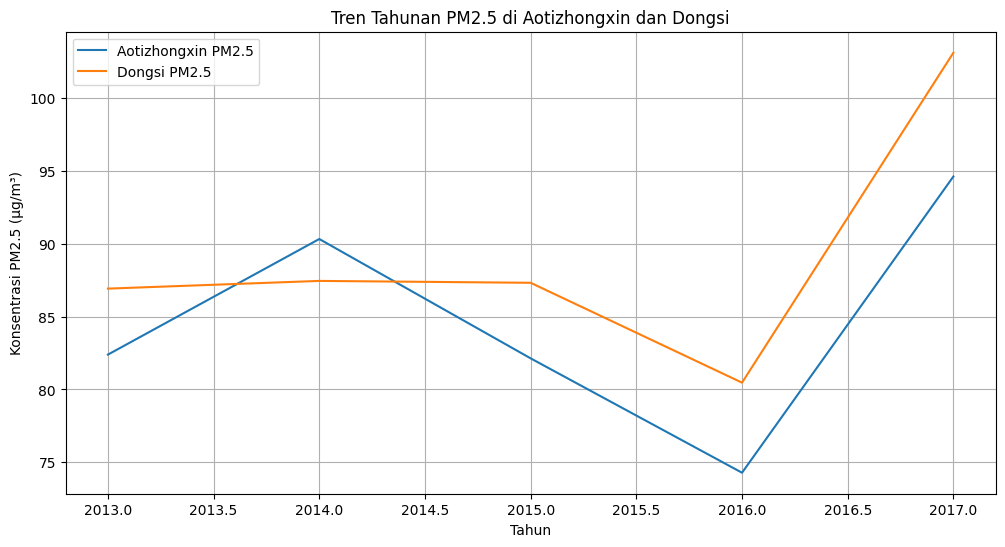

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_data_aotizhongxin.index, yearly_data_aotizhongxin['PM2.5'], label='Aotizhongxin PM2.5')
plt.plot(yearly_data_dongsin.index, yearly_data_dongsin['PM2.5'], label='Dongsi PM2.5')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.title('Tren Tahunan PM2.5 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.
- Terlihat pada tahun 2014 PM2.5 untuk AOtizhongxin berada di titik lebih tinggi dari Dongsi untuk pertamakalinya.

In [126]:
monthly_data_aotizhongxin = aotizhongxin_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
monthly_data_dongsin = dongsin_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the monthly aggregated data for both locations
print("Monthly Aggregated Data for Aotizhongxin:\n", monthly_data_aotizhongxin)
print("\nm\Monthly Aggregated Data for Dongsi:\n", monthly_data_dongsin)


Monthly Aggregated Data for Aotizhongxin:
             PM2.5        PM10        SO2        NO2           CO         O3
month                                                                      
1       92.732675  113.883041  34.788355  65.989555  1946.694215  27.507043
2       85.789754  104.198207  30.963974  53.742529  1438.642713  44.065822
3       99.698396  149.935663  31.560548  63.382581  1371.332015  47.826121
4       76.495844  130.476657  16.432616  53.039104   868.469128  65.064639
5       67.454173  115.555446  16.068538  48.960845   802.230237  88.404708
6       72.029357   87.055712   8.511046  49.536572   949.274691  94.122262
7       75.370569   85.511982   5.943801  48.224902   841.318772  95.551312
8       56.259276   72.404673   4.578948  48.844430   817.601447  84.896939
9       64.710502   87.373734   7.341241  59.397238   922.123919  52.039146
10      96.225832  119.123390  10.815526  74.165288  1189.255203  28.457867
11      98.369994  123.789481  15.907802  72.

**Insight:**
- Mengelompokkan data berdasarkan kategori bulan untuk analisis tren.
- Ini juga berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


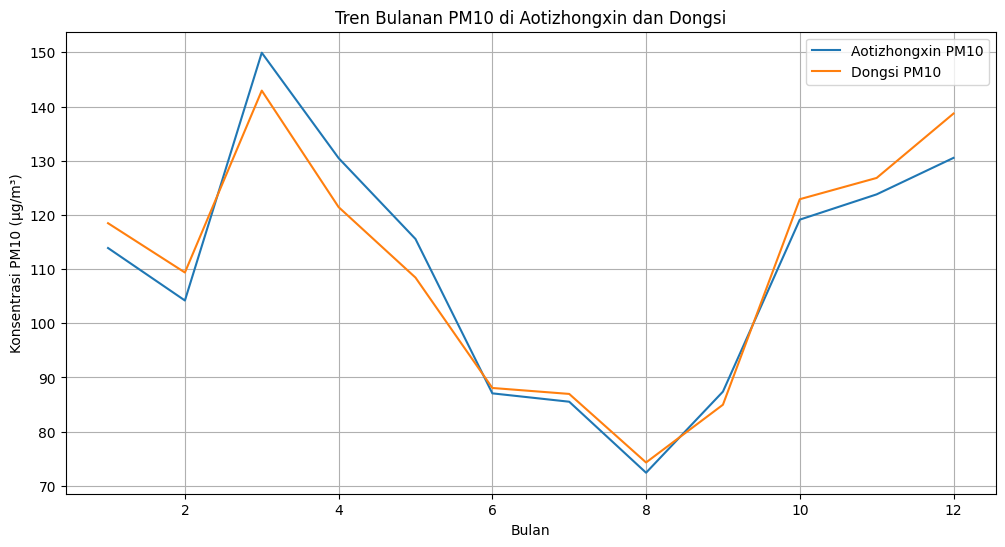

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_aotizhongxin.index, monthly_data_aotizhongxin['PM10'], label='Aotizhongxin PM10')
plt.plot(monthly_data_dongsin.index, monthly_data_dongsin['PM10'], label='Dongsi PM10')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.title('Tren Bulanan PM10 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.
- Untuk grafik diatas kedua dataset saling mengikuti yang menunjukkan PM10 kedua tempat tidak jauh beda untuk tren bulanannya.

In [128]:
daily_data_aotizhongxin = aotizhongxin_df.groupby('day')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
daily_data_dongsin = dongsin_df.groupby('day')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the daily aggregated data for both locations
print("Daily Aggregated Data for Aotizhongxin:\n", daily_data_aotizhongxin)
print("\nm\Daily Aggregated Data for Dongsi:\n", daily_data_dongsin)


Daily Aggregated Data for Aotizhongxin:
          PM2.5        PM10        SO2        NO2           CO         O3
day                                                                     
1    90.470927  113.925474  15.053873  59.120315  1254.240865  53.388991
2    75.060679   93.564724  18.128326  57.484180  1243.863382  53.400507
3    86.846568  115.782642  19.123989  59.809696  1402.868268  57.454095
4    93.991598  117.620712  17.101710  61.725678  1539.550025  58.759832
5    79.000164  104.116739  15.995030  55.068252  1248.897342  62.028387
6    89.470929  113.793059  19.220735  57.899153  1385.877864  58.053479
7    88.384090  110.848061  18.994010  58.472611  1401.358434  55.370616
8    85.181784  107.794585  18.974159  55.923262  1234.437808  58.581033
9    73.972010   99.682158  16.146371  56.076800  1146.710769  55.716379
10   65.201824   93.567663  16.333218  54.293542  1092.488939  55.599613
11   69.459726   91.204308  18.082235  55.314731  1145.798596  55.338293
12   63.71

**Insight:**
- Mengelompokkan data berdasarkan kategori bulan untuk analisis tren.
- Ini juga berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


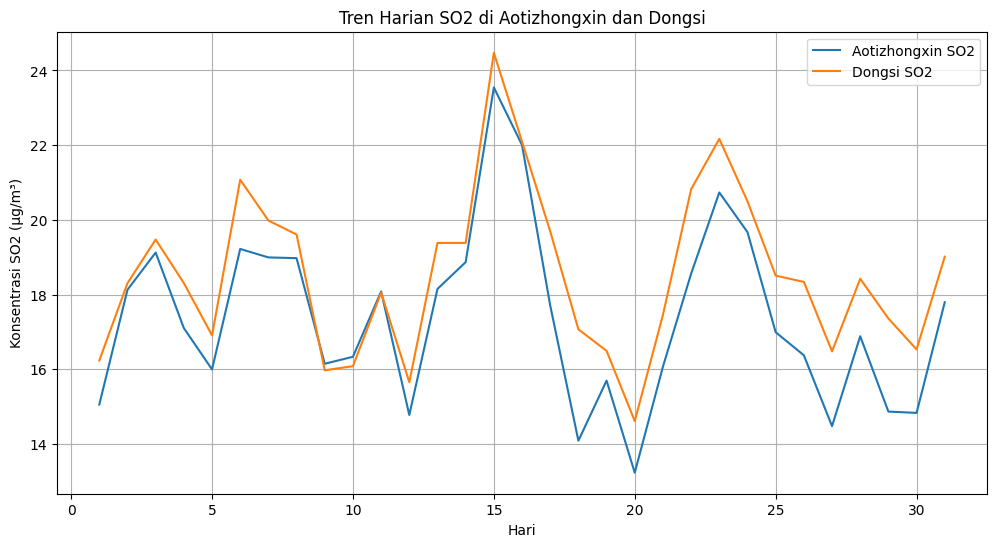

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data_aotizhongxin.index, daily_data_aotizhongxin['SO2'], label='Aotizhongxin SO2')
plt.plot(daily_data_dongsin.index, daily_data_dongsin['SO2'], label='Dongsi SO2')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi SO2 (µg/m³)')
plt.title('Tren Harian SO2 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.


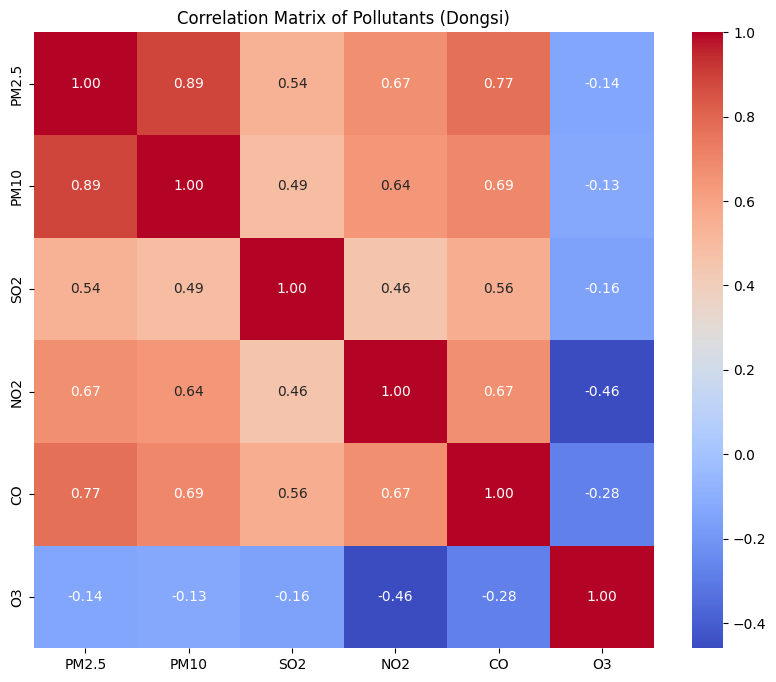

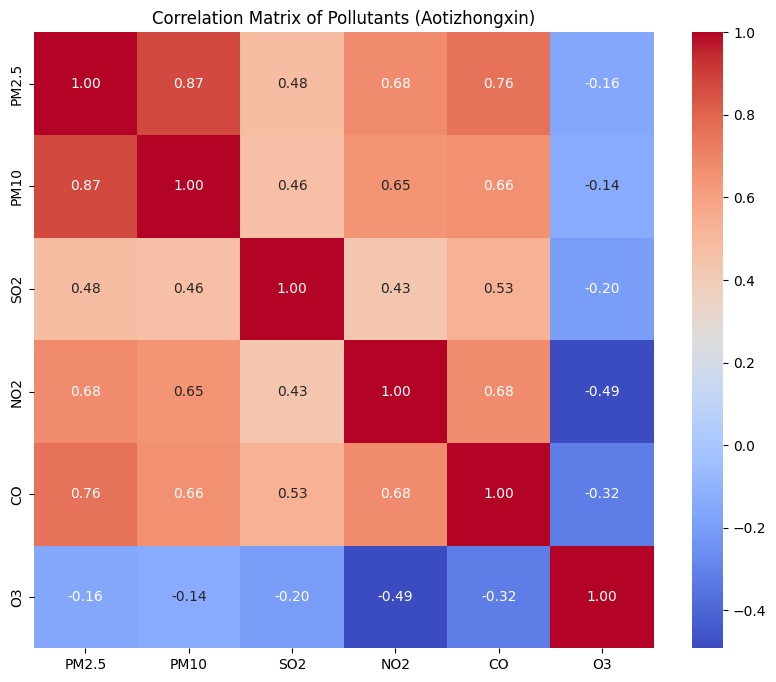

In [130]:
# Calculate the correlation matrix
correlation_matrix = dongsin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants (Dongsi)')
plt.show()

# Calculate the correlation matrix for aotizhongxin_df
correlation_matrix_aotizhongxin = aotizhongxin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create the heatmap for aotizhongxin_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_aotizhongxin, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants (Aotizhongxin)')
plt.show()


**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Ini untuk mengetahui hubungan atau korelasi antar variabel satu dengan yang lainnya dalam menentukan kualitas udara di kedua tempat.

### Apakah ada korelasi antara kondisi cuaca (suhu, tekanan, kelembaban, curah hujan) dan tingkat polusi udara?

In [131]:
korelasi = combined_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

**Insight:**
- Menghitung korelasi antar variabel dalam dataset.
- Ini membantu dalam memahami hubungan antara polutan udara dan faktor lainnya seperti suhu atau curah hujan.


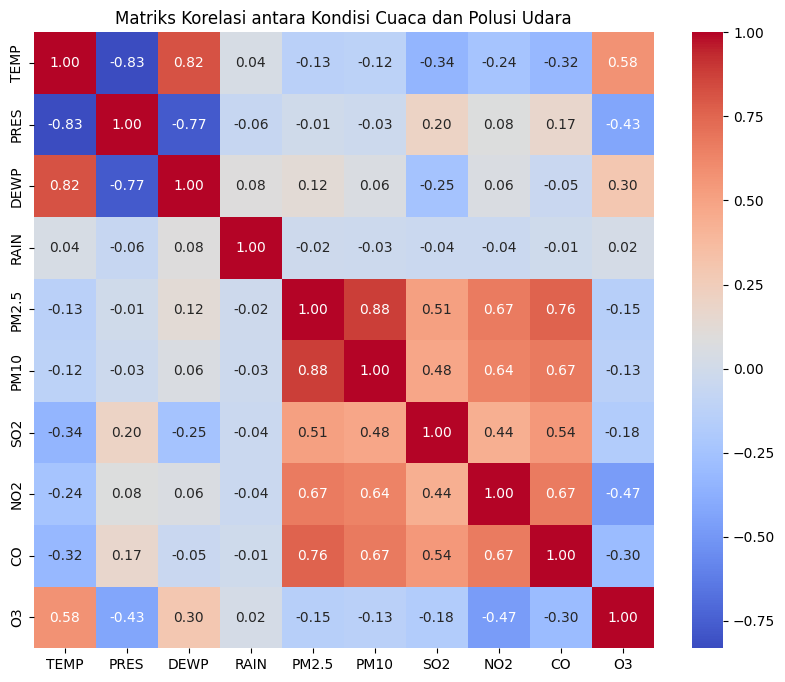

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Kondisi Cuaca dan Polusi Udara')
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.


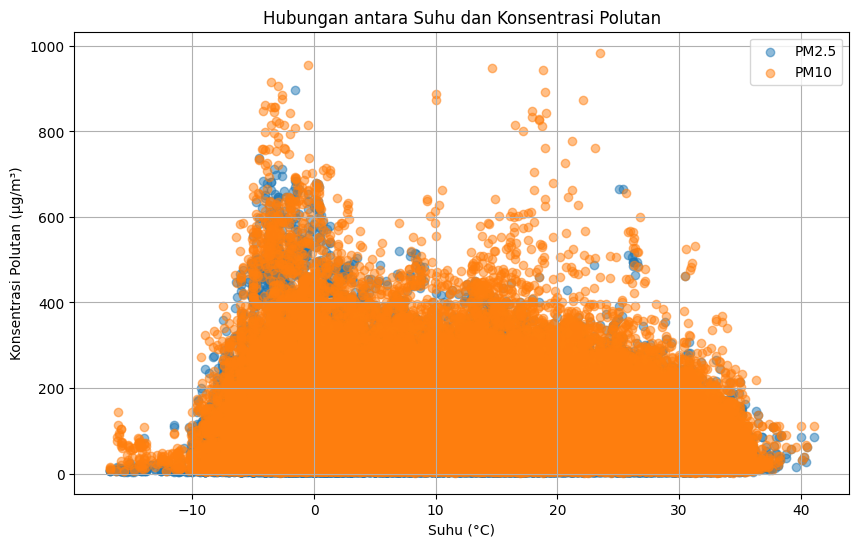

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['TEMP'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['TEMP'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Suhu dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara lebih tinggi pada suhu rendah dan menurun saat suhu meningkat.
- PM10 memiliki konsentrasi lebih besar dibandingkan PM2.5, yang mungkin menunjukkan dominasi sumber polusi partikulat kasar, seperti debu atau emisi dari industri.
- Fenomena inversi suhu bisa menjadi faktor utama dalam meningkatnya polutan pada suhu rendah.

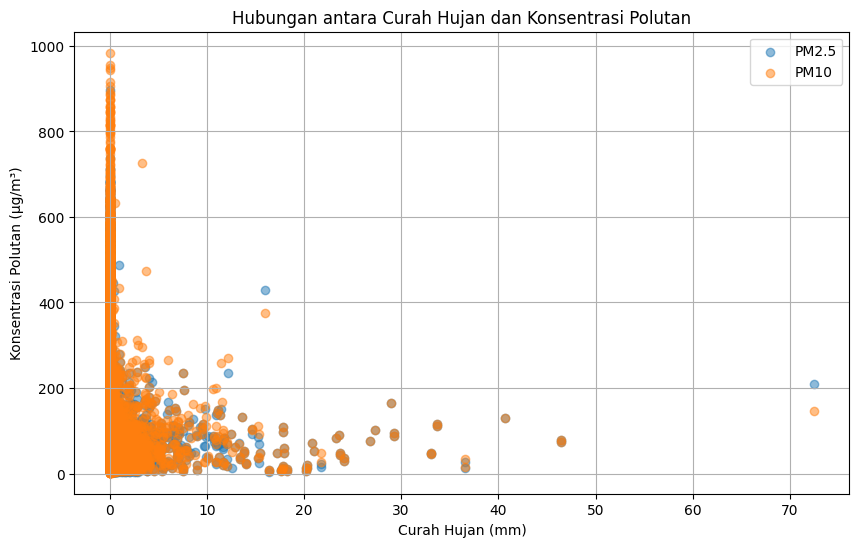

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['RAIN'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['RAIN'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Curah Hujan dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Curah hujan yang lebih tinggi efektif dalam menurunkan polusi udara.
- Polusi tertinggi terjadi saat tidak ada atau sedikit curah hujan, yang mungkin disebabkan oleh akumulasi polutan tanpa proses pencucian alami oleh hujan.
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa polusi partikel kasar lebih umum dalam dataset ini.

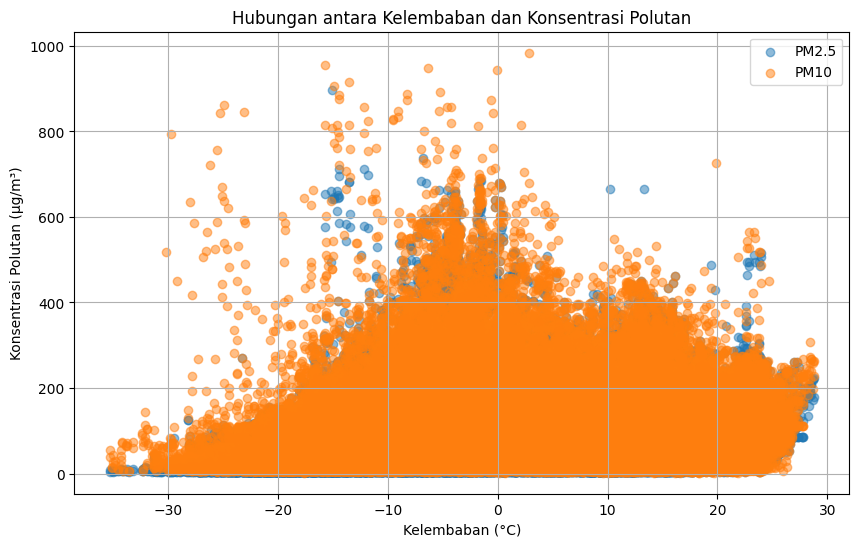

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['DEWP'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['DEWP'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Kelembaban (°C)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Kelembaban dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara cenderung meningkat pada kelembaban sedang dan menurun saat kelembaban sangat tinggi atau sangat rendah.
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa polusi partikulat kasar lebih umum dalam dataset ini.
- Kelembaban tinggi dapat membantu membersihkan udara, tetapi pada tingkat sedang justru dapat meningkatkan akumulasi polutan

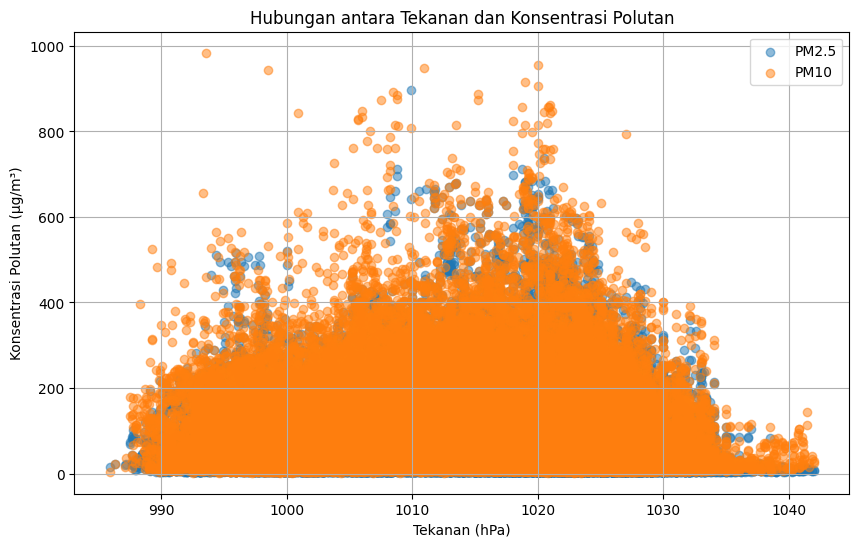

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['PRES'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['PRES'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Tekanan (hPa)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Tekanan dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara cenderung lebih tinggi pada tekanan sedang dan lebih rendah pada tekanan ekstrem (sangat rendah atau sangat tinggi).
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa partikel kasar lebih umum dalam dataset ini.
- Stabilitas atmosfer akibat tekanan udara sedang dapat menyebabkan akumulasi polutan di permukaan.

## Analisis Lanjutan (Opsional)

### Geospatial Analysis

In [140]:
# Buat peta dasar (gunakan lokasi tengah Beijing)
m = folium.Map(location=[39.9042, 116.4074], zoom_start=13, tiles="OpenStreetMap")

# Pastikan hanya baris dengan data lokasi yang valid
geo_df = combined_df.dropna(subset=['latitude', 'longitude', 'PM2.5'])

# Tambahkan HeatMap berdasarkan PM2.5
heat_data = geo_df[['latitude', 'longitude', 'PM2.5']].values.tolist()
HeatMap(heat_data).add_to(m)

# Tampilkan peta
m

**Insight:**
- Titik merah menunjukkan lokasi dengan tingkat polusi tertinggi.
- Area biru dan hijau memiliki konsentrasi polusi lebih rendah.
- Distribusi polusi tidak merata, menunjukkan bahwa beberapa area lebih rentan terhadap kualitas udara buruk dibandingkan yang lain.

### Clustering

In [142]:
# Definisikan rentang dan label untuk PM2.5
bins_pm25 = [0, 30, 60, float('inf')]  # Rentang PM2.5
labels_pm25 = ['Low', 'Medium', 'High']  # Label cluster

# Tambahkan kolom cluster berdasarkan PM2.5
combined_df['cluster_pm25'] = pd.cut(combined_df['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# Cek hasil grouping
print(combined_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0   300.0  ...   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0   300.0  ...   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0   300.0  ...   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0   300.0  ...   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0   300.0  ...   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...  ...   
70123  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
70124  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
70125  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
70126  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
70127  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

       TEMP    PRES  DEWP  RAIN   wd WSPM       station latitud

**Insight:**
- Data PM2.5 dikategorikan ke dalam tiga kelompok yaitu Low, Medium, dan High berdasarkan rentang nilai tertentu.
- Kolom cluster_pm25 dibuat untuk mempermudah analisis dan visualisasi tingkat polusi udara.

In [143]:
# Hitung jumlah stasiun di setiap cluster PM2.5
print(combined_df['cluster_pm25'].value_counts())

# Hitung rata-rata PM2.5 di setiap cluster
print(combined_df.groupby('cluster_pm25')['PM2.5'].mean())

cluster_pm25
High      35539
Low       21643
Medium    12946
Name: count, dtype: int64
cluster_pm25
Low        14.826461
Medium     44.772802
High      141.370689
Name: PM2.5, dtype: float64


<ipython-input-143-18b2a0ab8ab3>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Insight:**
- Mayoritas data berada di kategori High (35.539), diikuti Low (21.643) dan Medium (12.946), menunjukkan polusi PM2.5 lebih sering tinggi.
- Rata-rata PM2.5 di cluster High (141.37) jauh lebih besar dibanding Medium (44.77) dan Low (14.83), menegaskan perbedaan signifikan antar kategori.

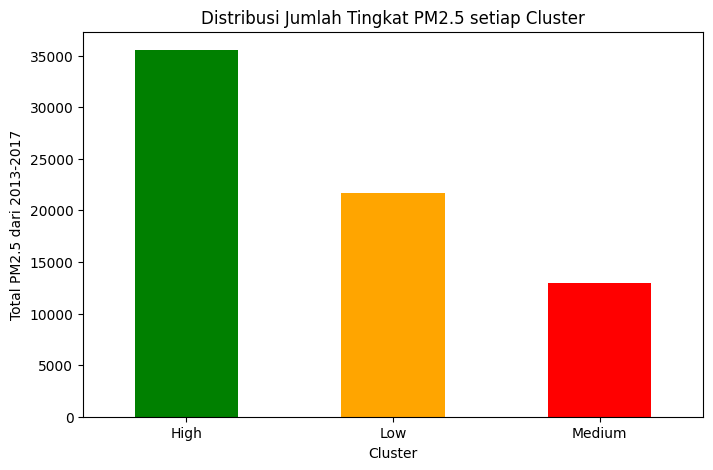

In [144]:
# Hitung jumlah data dari tahun 2013-2017 stasiun di setiap cluster PM2.5
cluster_counts = combined_df['cluster_pm25'].value_counts()

# Buat bar plot
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribusi Jumlah Tingkat PM2.5 setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total PM2.5 dari 2013-2017')
plt.xticks(rotation=0)
plt.show()

**Insight:**
1. Cluster "High" (Hijau)
  - Memiliki jumlah stasiun tertinggi (lebih dari 35.000).
  - Ini menunjukkan bahwa banyak stasiun pemantauan mendeteksi konsentrasi PM2.5 yang tinggi.

2. Cluster "Low" (Oranye)
  - Memiliki jumlah stasiun sekitar 22.000.
  - Ini berarti ada cukup banyak stasiun yang mendeteksi tingkat PM2.5 yang rendah.

3. Cluster "Medium" (Merah)
  - Memiliki jumlah stasiun paling sedikit (sekitar 12.000).
  - Ini menunjukkan bahwa tingkat polusi PM2.5 dalam kategori sedang lebih jarang terdeteksi dibanding kategori tinggi dan rendah.

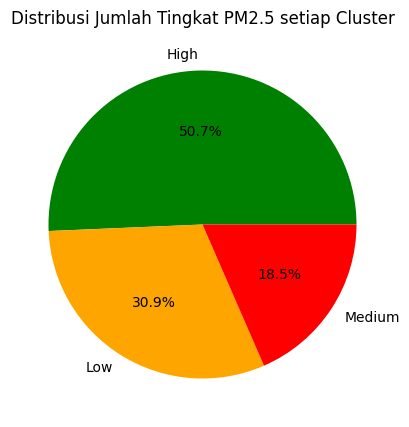

In [145]:
# Buat pie chart
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Distribusi Jumlah Tingkat PM2.5 setiap Cluster')
plt.ylabel('')
plt.show()

**Insight:**
1. Cluster "High" (Hijau) - 50.7%
  - Lebih dari separuh stasiun mendeteksi tingkat PM2.5 yang tinggi.
  - Ini menunjukkan bahwa polusi udara di wilayah ini dominan berada dalam kategori tinggi.
2. Cluster "Low" (Oranye) - 30.9%
  - Hampir sepertiga stasiun mendeteksi tingkat PM2.5 yang rendah.
  - Ada kemungkinan wilayah-wilayah tertentu memiliki kualitas udara yang relatif baik.
3. Cluster "Medium" (Merah) - 18.5%
  - Jumlah stasiun dengan tingkat PM2.5 sedang adalah yang paling sedikit.
  - Menunjukkan bahwa kualitas udara jarang berada dalam kondisi sedang, lebih sering ekstrem (tinggi/rendah).

## Conclusion

1. **Conclution pertanyaan 1 :** "Bagaimana Tren Kualitas Udara di Pusat Kota Beijing Berubah dari Waktu ke Waktu?"
  - Analisis tren kualitas udara berdasarkan parameter PM2.5, PM10, SO2, NO2, CO, dan O3 menunjukkan adanya fluktuasi signifikan dalam jangka waktu tertentu.
  - Pola musiman terlihat jelas, di mana tingkat polusi udara cenderung lebih tinggi selama musim dingin dan lebih rendah selama musim panas. Hal ini dapat dikaitkan dengan peningkatan penggunaan bahan bakar fosil untuk pemanasan serta inversi suhu yang memerangkap polutan di dekat permukaan.
  - Tren jangka panjang menunjukkan adanya penurunan kadar polutan tertentu, seperti SO2, yang kemungkinan besar disebabkan oleh kebijakan pengurangan emisi industri dan peralihan ke energi yang lebih bersih.
  - Dari analisis time series, terlihat adanya lonjakan polusi udara pada hari-hari tertentu, yang dapat dikaitkan dengan peristiwa seperti peningkatan aktivitas industri, transportasi, atau kondisi atmosfer yang memperburuk kualitas udara.
  - Visualisasi data menggunakan line plot dan moving average menunjukkan adanya pola siklik dan tren menurun untuk beberapa polutan utama, yang mencerminkan upaya pengendalian polusi yang mulai menunjukkan dampaknya.
2. **Conclusion pertanyaan :** "Apakah Ada Korelasi antara Kondisi Cuaca dan Tingkat Polusi Udara?"
  - Dari analisis korelasi menggunakan heatmap dan scatter plot, ditemukan bahwa suhu memiliki korelasi negatif dengan konsentrasi polutan udara, terutama PM2.5 dan PM10. Ini menunjukkan bahwa suhu yang lebih tinggi cenderung membantu menyebarkan polutan, sehingga mengurangi konsentrasi di permukaan tanah.
  - Tekanan udara tidak memiliki korelasi yang konsisten dengan tingkat polusi, tetapi dalam beberapa kasus, tekanan yang lebih tinggi dapat berkontribusi pada stabilitas atmosfer yang memperparah akumulasi polutan.
  - Kelembaban udara menunjukkan korelasi negatif dengan polutan partikulat (PM2.5 dan PM10), yang menunjukkan bahwa tingkat kelembaban yang tinggi dapat membantu menurunkan kadar polutan melalui proses deposisi.
  - Curah hujan memiliki dampak yang signifikan dalam mengurangi tingkat polusi udara melalui pencucian atmosfer (wet deposition). Dari analisis data, ditemukan bahwa kadar polutan turun secara drastis setelah hari-hari dengan curah hujan tinggi, yang mengindikasikan efektivitas hujan dalam membersihkan udara dari polutan.